<a href="https://colab.research.google.com/github/vvarma7262/Vaibhav/blob/master/FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECTIVE : The dataset contains detailed attributes for every player registered in the latest edition of FIFA 19 database. Our objective is to create Linear, Multiple and Polynomail Regression models to predict the potential of a player based on several attributes.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [0]:
# reading dataset 
data=pd.read_csv("../input/data.csv")

In [0]:
# displaying first 5 rows
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [0]:
data.shape #(no. of rows, no. of columns)

(18207, 89)

In [0]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [0]:
# finding any null values in data
data.isnull().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                     True
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST            

#  Linear Regression - Predicting Potential based on Age of the player

In [0]:
# x = Age(independent variable)
x=data.iloc[:,3] 

In [0]:
x.head()

0    31
1    33
2    26
3    27
4    27
Name: Age, dtype: int64

In [0]:
x.isnull().any()

False

In [0]:
# y = Potential(dependent variable)
y=data.iloc[:,8]

In [0]:
y.head()

0    94
1    94
2    93
3    93
4    92
Name: Potential, dtype: int64

In [0]:
y.isnull().any()

False

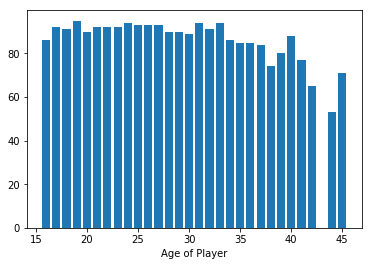

In [0]:
plt.bar(data["Age"],data["Potential"])
plt.xlabel("Age of Player")
plt.show()

In [0]:
# splitting data into train and tet set
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# making object regressor of class LinearRegression
regressor=LinearRegression()

I was facing errors with fitting the data so we reshape x_train and y_train by first converting them into ndarray.

In [0]:
type(x_train)
type(y_train)

pandas.core.series.Series

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [0]:
type(x_train)
type(y_train)

numpy.ndarray

In [0]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)


In [0]:
# fitting training set into object regressor
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

To avoid error in prediting we reshape x_test also.

In [0]:
x_test=np.array(x_test)

In [0]:
x_test=x_test.reshape(-1,1)

In [0]:
# Predicting y from test set
y_pred= regressor.predict(x_test)

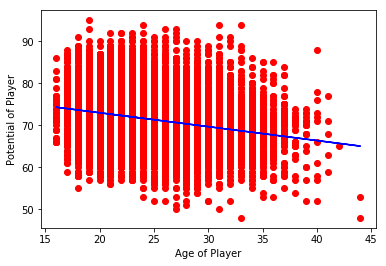

In [0]:
# Visualising training dataset
plt.scatter(x_train,y_train,color="red")
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.plot(x_train, regressor.predict(x_train),color="blue") # To draw line of regression
plt.show()

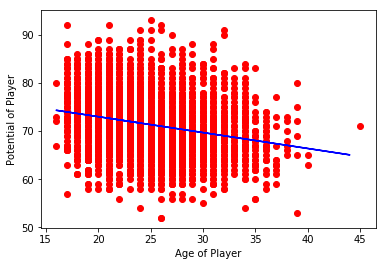

In [0]:
# Visualising test dataset
plt.scatter(x_test,y_test,color="red")
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.plot(x_train, regressor.predict(x_train),color="blue")
plt.show()

In [0]:
# Finding intercept of linear regression line
regressor.intercept_

array([79.61593458])

In [0]:
# Finding coefficient of linear regression line
regressor.coef_

array([[-0.33049799]])

In [0]:
# Finding mean squared error of linear regression model
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(y_test,y_pred)

35.42740657794979

# Multiple regression - Predicting potential based on age, agility, balance, stamina, strength, composure


In [0]:
# independent variables are - Age, Agility, Balance, stamina, Strength, Composure
x=data.iloc[:,[3,66,68,71,72,79]]

In [0]:
x.head()

,Age,Agility,Balance,Stamina,Strength,Composure
0,31,91.0,95.0,72.0,59.0,96.0
1,33,87.0,70.0,88.0,79.0,95.0
2,26,96.0,84.0,81.0,49.0,94.0
3,27,60.0,43.0,43.0,64.0,68.0
4,27,79.0,77.0,90.0,75.0,88.0


In [0]:
# checking if there are null values in x and then filling them. 
x.isnull().any()

Age          False
Agility       True
Balance       True
Stamina       True
Strength      True
Composure     True
dtype: bool

In [0]:
x=x.fillna(method='ffill')

In [0]:
x.isnull().any()

Age          False
Agility      False
Balance      False
Stamina      False
Strength     False
Composure    False
dtype: bool

In [0]:
# dependent variable = Potential
y=data.iloc[:,8]

In [0]:
y.head()

0    94
1    94
2    93
3    93
4    92
Name: Potential, dtype: int64

In [0]:
y.isnull().any()

False

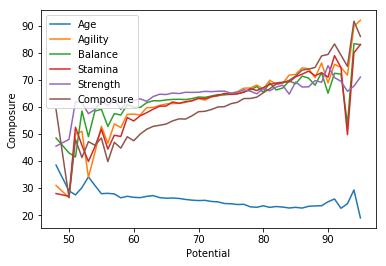

In [0]:
sns.lineplot(x="Potential", y="Age",data=data,label="Age", ci= None)
sns.lineplot(x="Potential", y="Agility",data=data,label="Agility", ci= None)
sns.lineplot(x="Potential", y="Balance",data=data,label="Balance", ci= None)
sns.lineplot(x="Potential", y="Stamina",data=data,label="Stamina", ci= None)
sns.lineplot(x="Potential", y="Strength",data=data,label="Strength", ci= None)
sns.lineplot(x="Potential", y="Composure",data=data,label="Composure", ci= None)


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [0]:
regressor=LinearRegression()

In [0]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
regressor.predict(x_test)

array([81.24366607, 71.97538391, 64.72317953, ..., 75.10859409,
       75.20760949, 74.80958061])

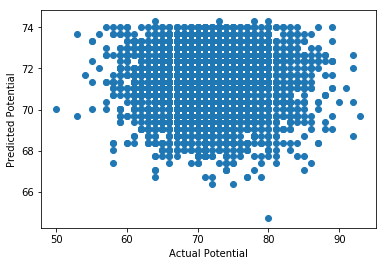

In [0]:
# Visualising Actual and predicted values of Potential of player
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Potential")
plt.ylabel("Predicted Potential")
plt.show()

Seems like the actual and predicted values are very close to each other.

In [0]:
regressor.intercept_

68.99347413204013

In [0]:
regressor.coef_

array([-0.71801693,  0.02961049, -0.04482728, -0.04580513,  0.03362954,
        0.37557222])

Backward Elimination - Making optimal regression model by finding the statistical significance of all independent variables

In [0]:
# let us take the significance level (SL)= 0.05
import statsmodels.formula.api as sm

In [0]:
# fitting all variables in the model
regressor_OLS=sm.OLS(endog=y,exog=x).fit()

In [0]:
# Finding statistical summary of all variables
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.211e+05
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        09:28:00   Log-Likelihood:                -64422.
No. Observations:               18207   AIC:                         1.289e+05
Df Residuals:                   18201   BIC:                         1.289e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.1507      0.014    -10.593      0.000      -0.179      -0.123
Agility        0.1331      0.007     18.448      0.000       0.119       0.147
Balance        0.3864      0.007     58.335      0.000       0.373       0.399
Stamina       -0.2149      0.006    -38.460      0.000      -0.226      -0.204
Strength       0.5346      0.005    101.205      0.000       0.524       0.545
Composure      0.3397      0.007     46.532      0.000       0.325       0.354
==============================================================================
Omnibus:                      847.699   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1050.686
Skew:                           0.494   Prob(JB):                    7.02e-229
Kurtosis:                       3.641   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we see all the P- values are less than SL(0.05), that means all the variables are significant and none of them can be removed. 
t-value shows the statistical significane of each variable.
F-static shows us how significant the fit is. 
Adjusted- R is 0.986 that means our model explains 98.6% variables in dependent variables.

# Polynomial Regression - Predicting potential based on the age of player

In [0]:
# independent variable= age
x=data.iloc[:,3]

In [0]:
x.head()

0    31
1    33
2    26
3    27
4    27
Name: Age, dtype: int64

In [0]:
# dependent variable = potential
y=data.iloc[:,8]

In [0]:
y.head()

0    94
1    94
2    93
3    93
4    92
Name: Potential, dtype: int64

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [0]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

In [0]:
lin_reg_1=LinearRegression()

In [0]:
lin_reg_1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
x_test=np.array(x_test)

In [0]:
x_test=x_test.reshape(-1,1)

In [0]:
y_pred_1=lin_reg_1.predict(x_test)

In [0]:
# Making polynomail regression model
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly_reg=PolynomialFeatures(degree=3)

In [0]:
x=np.array(x)

In [0]:
x=x.reshape(-1,1)

In [0]:
# Making polynomial matrix of x of degree 3
x_poly=poly_reg.fit_transform(x)

In [0]:
x_poly

array([[1.0000e+00, 3.1000e+01, 9.6100e+02, 2.9791e+04],
       [1.0000e+00, 3.3000e+01, 1.0890e+03, 3.5937e+04],
       [1.0000e+00, 2.6000e+01, 6.7600e+02, 1.7576e+04],
       ...,
       [1.0000e+00, 1.6000e+01, 2.5600e+02, 4.0960e+03],
       [1.0000e+00, 1.7000e+01, 2.8900e+02, 4.9130e+03],
       [1.0000e+00, 1.6000e+01, 2.5600e+02, 4.0960e+03]])

In [0]:
x_poly_train,x_poly_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.2, random_state=42)

In [0]:
# Making another object to fit polynomial set
lin_reg_2=LinearRegression()

In [0]:
lin_reg_2.fit(x_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred_2=lin_reg_2.predict(x_poly_test)

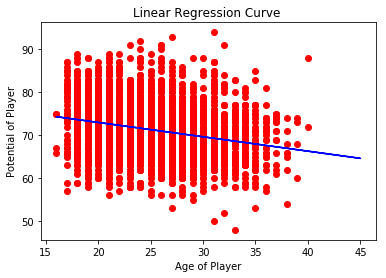

In [0]:
# Visualizing Linear Regression Model
plt.scatter(x_test,y_test,color='red')
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.title("Linear Regression Curve ")
plt.plot(x_train,lin_reg_1.predict(x_train),color='blue')
plt.show()

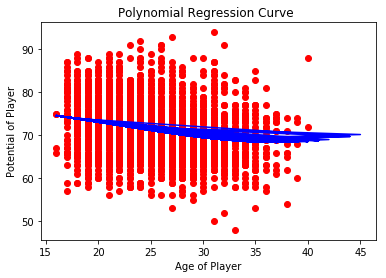

In [0]:
# Visualizing Polynomial Regression Model
plt.scatter(x_test,y_test,color='red')
plt.xlabel("Age of Player")
plt.ylabel("Potential of Player")
plt.title("Polynomial Regression Curve ")
plt.plot(x_train,lin_reg_2.predict(poly_reg.fit_transform(x_train)),color='blue')
plt.show()

In [0]:
mean_squared_error(y_test,y_pred_2)

34.035984061599706

We can see the mean squared error of polynomail regression model < mean squared error of linear regression model. So polynomail regression model is more accurate.